In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AR, ARResults

In [5]:
df = pd.read_csv("C:\\Users\\srnva\\Desktop\\UDEMY\\UDEMY_TSA_FINAL\\Data\\uspopulation.csv", index_col = 'DATE', parse_dates=True)

In [7]:
df.index.freq = 'MS'

In [8]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


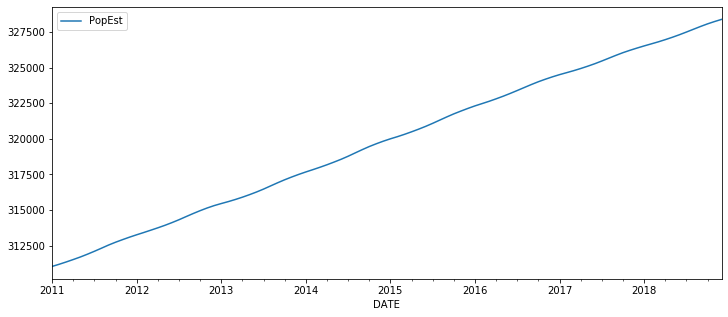

In [9]:
df.plot(figsize=(12,5))

In [12]:
train = df.iloc[:84]

In [13]:
test = df.iloc[84:]

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
model = AR(train['PopEst'])

In [16]:
AR1fit = model.fit(maxlag=1)

In [17]:
AR1fit.aic

6.410771237031995

In [20]:
AR1fit.k_ar  # will tell u how many lags

1

In [21]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [22]:
start = len(train)

In [23]:
end = len(train) + len(test) - 1

In [24]:
AR1fit.predict(start, end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [25]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [26]:
predictions1 = AR1fit.predict(start, end)

In [28]:
predictions1 = predictions1.rename('AR(1) Predictions')

In [29]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

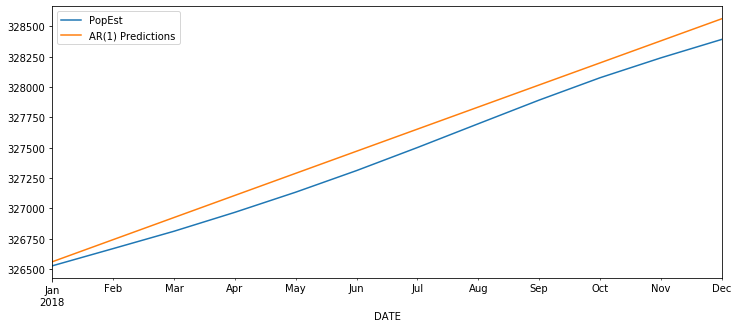

In [31]:
test.plot(figsize=(12,5), legend=True)
predictions1.plot(legend=True)

In [33]:
AR2fit = model.fit(maxlag=2)
predictions2 = AR2fit.predict(start, end)
predictions2 = predictions2.rename('AR(2) Predictions')

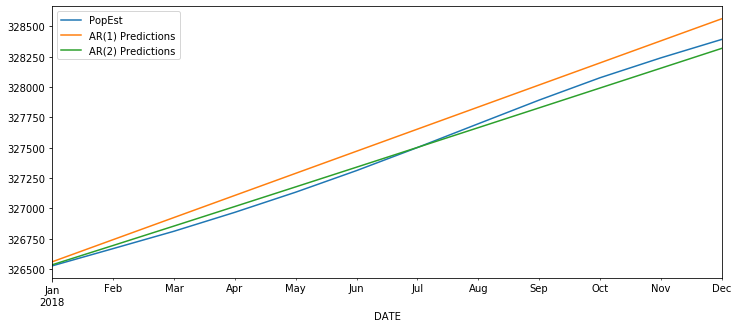

In [34]:
test.plot(figsize=(12,5), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [35]:
ARfit = model.fit(ic='t-stat')

In [36]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [39]:
predictions8 = ARfit.predict(start, end)
predictions8 = predictions8.rename('AR(8) Predictions')

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
labels = ['AR1','AR2', 'AR8']

In [40]:
preds = [predictions1, predictions2, predictions8]

In [41]:
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE is {error}')

AR1 MSE is 17449.714237833407
AR2 MSE is 2713.258683668394
AR8 MSE is 186.97263605698208


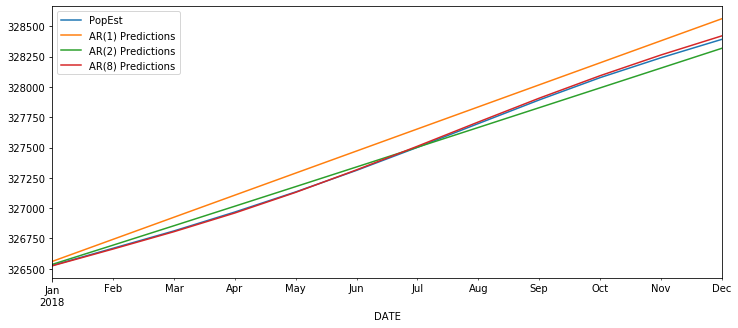

In [42]:
test.plot(figsize=(12,5), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

## Forecasting Future

In [43]:
model = AR(df['PopEst'])
ARfit = model.fit()
predictions = ARfit.predict(start=len(df), end=len(df)+12).rename('Forecast')

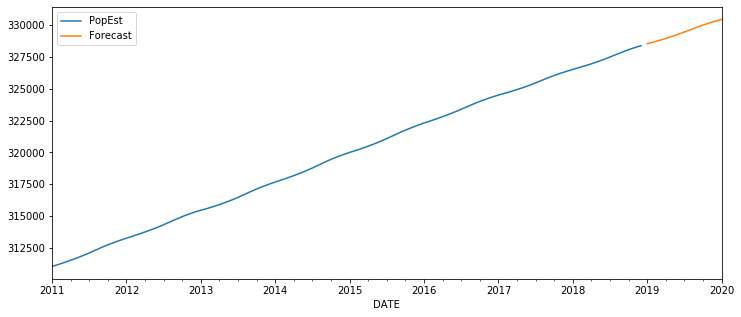

In [45]:
df['PopEst'].plot(figsize=(12,5), legend=True)
predictions.plot(legend=True)